## Emisiones de CO2 en el mundo
#### Predicciones y tendencias por medio de ajuste de curvas



Fernando González García Figueroa

Juan Diego Hermosillo

Jonathan

In [3]:
%pip install quandl

Note: you may need to restart the kernel to use updated packages.


#### Se estudian las emisiones de CO2 en el mundo desde una perspectiva global, analizando la union europa, asia del pacífico, medio oriente de africa y latinoamerica. Asi también como países de suramérica.

Se importaron los datos desde: https://data.worldbank.org/indicator/EN.ATM.CO2E.KT?view=chart

Se graficaron como se muestra a continuación:

In [4]:
# Se importan las librerías necesarias
import quandl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize as opt

%matplotlib inline

In [5]:

data=pd.read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_8007601.csv',sep=';')
data

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2508.228,2500.894,1349.456,861.745,872.746,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,1092.766,1283.450,1224.778,...,8463.436,12240.446,10755.311,10014.577,9809.225,NaN,NaN,NaN,NaN,NaN
2,Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,1554.808,993.757,1672.152,...,29057.308,30340.758,33399.036,32617.965,34763.160,NaN,NaN,NaN,NaN,NaN
3,Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,2552.232,2680.577,3072.946,...,4598.418,5240.143,4910.113,5064.127,5716.853,NaN,NaN,NaN,NaN,NaN
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,517.047,491.378,487.711,476.710,462.042,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,Yemen,3633.997,2665.909,3887.020,2918.932,3633.997,3931.024,3465.315,3054.611,11646.392,...,23432.130,19666.121,18668.697,25496.651,22698.730,NaN,NaN,NaN,NaN,NaN
261,South Africa,97934.569,102213.958,105767.281,109826.650,119657.877,128260.659,128356.001,133885.837,138084.552,...,474099.096,470582.443,468770.945,466376.394,489771.854,NaN,NaN,NaN,NaN,NaN
262,Zambia,NaN,NaN,NaN,NaN,3278.298,3916.356,3501.985,4792.769,4572.749,...,2691.578,2937.267,3667.000,3956.693,4503.076,NaN,NaN,NaN,NaN,NaN


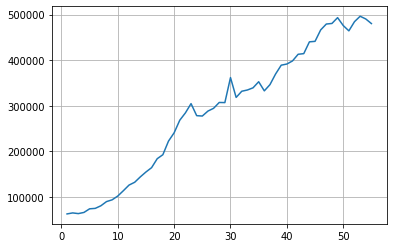

In [6]:
#Mexico
x=np.linspace(1960,2019,60)-1959
y=data.values[152,1:] 
plt.plot(x,y)
plt.grid()

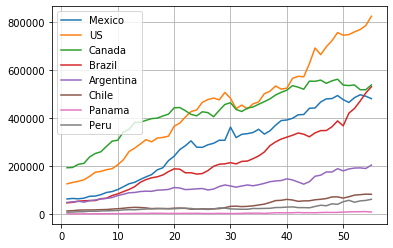

In [7]:
#America
y1=data.values[152,1:] #Mexico
y2=data.values[239,1:] #US 
y3=data.values[33,1:] #Canada
y4=data.values[27,1:] #Brazil
y5=data.values[7,1:] #Argentina
y6=data.values[37,1:] #Chile
y7=data.values[183,1:] #Panama 
y8=data.values[184,1:] #Peru

plt.plot(x,y1,label='Mexico')
plt.plot(x,y2,label='US')
plt.plot(x,y3,label='Canada')
plt.plot(x,y4,label='Brazil')
plt.plot(x,y5,label='Argentina')
plt.plot(x,y6,label='Chile')
plt.plot(x,y7,label='Panama')
plt.plot(x,y8,label='Peru')
plt.legend(loc='best')
plt.grid()

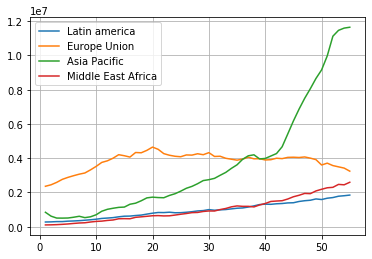

In [8]:
w=data.values[257,1:] #World
sa=data.values[234,1:] #Latin america
eu=data.values[71,1:] #Europe Union
ap=data.values[228,1:] #Asia Pacific
af=data.values[151,1:] #Middle East Africa

#plt.plot(x,w,label='World')
plt.plot(x,sa,label='Latin america')
plt.plot(x,eu,label='Europe Union')
plt.plot(x,ap,label='Asia Pacific')
plt.plot(x,af,label='Middle East Africa')
plt.legend(loc='best')
plt.grid()

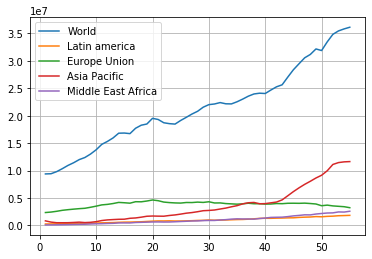

In [9]:
plt.plot(x,w,label='World')
plt.plot(x,sa,label='Latin america')
plt.plot(x,eu,label='Europe Union')
plt.plot(x,ap,label='Asia Pacific')
plt.plot(x,af,label='Middle East Africa')
plt.legend(loc='best')
plt.grid()

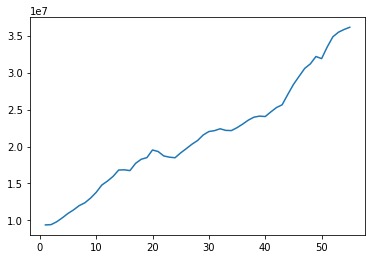

In [10]:
plt.plot(x,w,label='World')

In [11]:
# Importar scipy.optimize
import scipy.optimize as opt

#Mexico

def obj(beta,x,y,f):
    return np.sum((y-f(x,beta))**2)

# definimos la función a minimizar (Con respecto a los parámetros beta)

def f3(x,beta):
    return beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3

In [12]:
beta0_3=[1,1,1,1]
sol3=opt.minimize(obj,beta0_3,args=(x,y,f3))

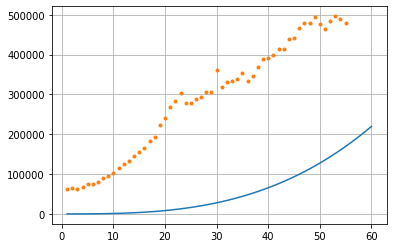

In [13]:
# Gráfica
plt.plot(x,f3(x,sol3.x))
plt.plot(x,y,'o',ms=3)
plt.grid()

Solución cúbica para México, la tendencia permanece a subir.

In [14]:
#World

def obj(beta,x,w,f):
    return np.sum((w-f(x,beta))**2)

def f4(x,beta):
    return beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3+beta[4]*x**4

In [15]:
beta0_4=[1,1,1,1,1]
sol4=opt.minimize(obj,beta0_4,args=(x,w,f4))

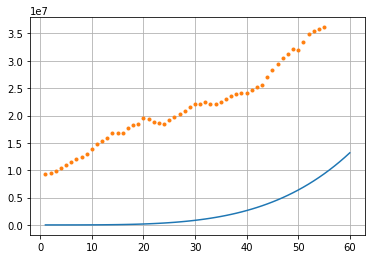

In [20]:
# Gráfica
plt.plot(x,f4(x,sol4.x))
plt.plot(x,w,'o',ms=3)
plt.grid()

Solución de polinomio de cuarto grado para la emisión total del mundo, al igual que el anterior la tendencia es a subir.

In [17]:
#US

def obj(beta,x,y2,f):
    return np.sum((y2-f(x,beta))**2)

def f3(x,beta):
    return beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3

In [18]:
beta0_3=[1,1,1,1]
sol3=opt.minimize(obj,beta0_3,args=(x,y2,f3))

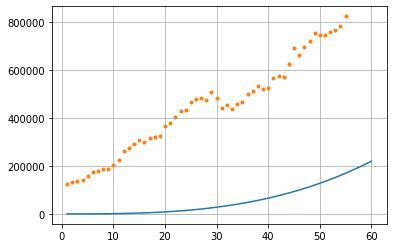

In [19]:
# Gráfica
plt.plot(x,f3(x,sol3.x))
plt.plot(x,y2,'o',ms=3)
plt.grid()

Por último, solución cúbica para emisiones de Estados Unidos, la tendencia igual a seguir subiendo